Scraping berita online dari situs Detik.com dari berbagai macam kategori

Kategori:
```
https://{}.detik.com/indeks/
1. finance: ekonomi, bisnis, dan investasi.
2. inet: teknologi, informasi, dan gadget.
3. sport: seputar olahraga.
4. oto: otomotif luar dan dalam negeri.
5. travel: inspirasi jalan-jalan ke mana saja.
6. food: kabar kuliner, resep, dan rekomendasi tempat makan.
7. health: artikel kesehatan, diet, seks, dan konsultasi.
-----------------------------------------------------------
https://www.detik.com/{}/indeks/
8. edu: dunia pendidikan.
9. properti: jual beli, sewa rumah, dan apartemen tanah
```





Data yang nantinya akan diambil adalah judul, tanggal publish, isi/konten berita, dan kategori yang diambil dari 9 kategori di atas.

In [32]:
from bs4 import BeautifulSoup as bs # tool scraping
from tqdm import tqdm # biar keren

import requests
import pandas as pd

In [33]:
kategori1 = ['finance', 'inet', 'sport', 'oto', 'travel', 'food', 'health']
kategori2 = ['edu', 'properti']

# dibedakan karena susunan URL nya berbeda


halaman = 1 # jumlah halaman, satu halaman memuat sekitar 20 berita
berita = []

# Scraping

In [25]:
# -- Kategori 1 --

for i in kategori1:
    print(f"Kategori - {i}:")
    for ii in range(halaman):
        url = f'https://{i}.detik.com/indeks?page={ii+1}'

        html = requests.get(url).text
        soup = bs(html, 'html.parser')

        container = soup.find_all("div", class_="container")

        for containers in tqdm(container, desc=f"\tHalaman - {ii+1}"):
            articles = containers.find_all("article", class_="list-content__item")

            for article in articles:
                judul = article.find("h3", class_="media__title").text.strip()

                # Karena judul berita yang diawali dengan "Video" itu pasti berupa video, bukan data text, jadi di sini dihapus (tidak dimasukkan), atau dilewati
                # "Infografis" = gambar

                if judul.startswith("Video") or judul.startswith("Infografis"):
                    continue

                link = article.find("a")["href"]

                #print(judul)
                #print(link)

                html_konten = requests.get(link).text
                soup_konten = bs(html_konten, 'html.parser')

                container_konten = soup_konten.find_all("div", class_="container")

                for containers_konten in container_konten:
                    articles_konten = containers_konten.find_all("article", class_="detail")

                    for article_konten in articles_konten:
                        #tanggal
                        tanggal = article_konten.find("div", class_="detail__date")
                        if tanggal:
                            tgl = tanggal.text.strip()
                            date = " ".join(tgl.split(", ")[1].split(" ")[:3])

                        konten = article_konten.find_all("p", class_ = None)

                        berita.append({
                            'judul': judul,
                            'tanggal': date,
                            'konten': '\n'.join([iii.text.strip() for iii in konten]),
                            'kategori': i
                        })

Kategori - finance:


	Halaman - 1: 100%|██████████| 5/5 [00:21<00:00,  4.22s/it]


Kategori - inet:


	Halaman - 1: 100%|██████████| 5/5 [00:22<00:00,  4.43s/it]


Kategori - sport:


	Halaman - 1: 100%|██████████| 5/5 [00:38<00:00,  7.76s/it]


Kategori - oto:


	Halaman - 1: 100%|██████████| 5/5 [00:31<00:00,  6.29s/it]


Kategori - travel:


	Halaman - 1: 100%|██████████| 5/5 [00:26<00:00,  5.26s/it]


Kategori - food:


	Halaman - 1: 100%|██████████| 5/5 [00:28<00:00,  5.74s/it]


Kategori - health:


	Halaman - 1: 100%|██████████| 5/5 [00:21<00:00,  4.30s/it]


In [26]:
# -- Kategori 2 --

# Dibuat beda sel, karena lama (tergantung jumlah halaman)

for i in kategori2:
    print(f'Kategori - {i}:')
    for ii in range(halaman):
        url = f'https://www.detik.com/{i}/indeks?page={ii+1}'

        html = requests.get(url).text
        soup = bs(html, 'html.parser')

        container = soup.find_all("div", class_="container")

        for containers in tqdm(container, desc=f"\tHalaman - {ii+1}"):
            articles = containers.find_all("article", class_="list-content__item")

            for article in articles:
                judul = article.find("h3", class_="media__title").text.strip()

                if judul.startswith("Video") or judul.startswith("Infografis"):
                    continue

                link = article.find("a")["href"]

                #print(judul)
                #print(link)

                html_konten = requests.get(link).text
                soup_konten = bs(html_konten, 'html.parser')

                container_konten = soup_konten.find_all("div", class_="container")

                for containers_konten in container_konten:
                    articles_konten = containers_konten.find_all("article", class_="detail")

                    for article_konten in articles_konten:
                        #tanggal
                        tanggal = article_konten.find("div", class_="detail__date")
                        if tanggal:
                            tgl = tanggal.text.strip()
                            date = " ".join(tgl.split(", ")[1].split(" ")[:3])

                        konten = article_konten.find_all("p", class_ = None)

                        berita.append({
                            'judul': judul,
                            'tanggal': date,
                            'konten': '\n'.join([iii.text.strip() for iii in konten]),
                            'kategori': i
                        })

Kategori - edu:


	Halaman - 1: 100%|██████████| 5/5 [00:26<00:00,  5.26s/it]


Kategori - properti:


	Halaman - 1: 100%|██████████| 5/5 [00:32<00:00,  6.53s/it]


In [27]:
df = pd.DataFrame(berita)
df

,judul,tanggal,konten,kategori
0,The Fed Pangkas Bunga Acuan 25 Basis Poin,19 Des 2024,The Federal Reserve atau The Fed sepakat menur...,finance
1,52 KA Tambahan Akan Layani Penumpang Selama Li...,19 Des 2024,Jakarta - PT KAI bersiap menghadapi libur Nata...,finance
2,"Bertemu Presiden Mesir, Prabowo Mau RI Ikut Zo...",19 Des 2024,Presiden Prabowo Subianto melakukan pertemuan ...,finance
3,Sahamnya Anjlok Sampai Mentok saat Debut Perda...,19 Des 2024,Pada pencatatan perdana saham atau initial pub...,finance
4,Diskon Listrik 50% & Bantuan Beras Hanya 2 Bul...,19 Des 2024,Ekonom mengkritik bantuan untuk meringankan ke...,finance
...,...,...,...,...
167,"Warga Kolong Jembatan Kini Tidur di Rusun, Fas...",18 Des 2024,"Sebanyak 48 KK dari 98 KK di Bandung, Jawa Bar...",properti
168,6 Langkah Mudah Bersihkan Kasur Biar Bebas Tungau,18 Des 2024,Seiring waktu kasur dapat menimbulkan noda dan...,properti
169,"Pasar Properti Bogor Cerah, Ruko Premium Laris...",18 Des 2024,Bogor adalah wilayah penyangga yang sangat dim...,properti
170,Model J Hotel Pertama Resmi Dibuka Dekat Banda...,18 Des 2024,Delonix Group Indonesia mengumumkan pembukaan ...,properti


In [28]:
df.isna().sum()

,0
judul,0
tanggal,0
konten,0
kategori,0


In [29]:
df['kategori'].value_counts()

,count
kategori,
sport,20
travel,20
food,20
edu,20
oto,19
properti,19
finance,18
inet,18
health,18


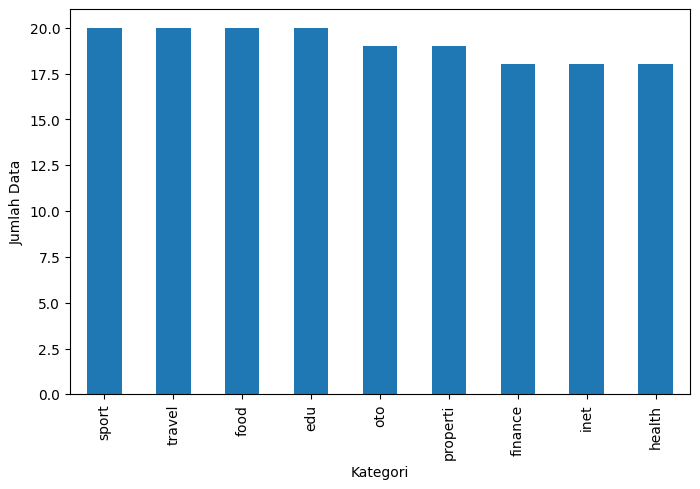

In [30]:
import matplotlib.pyplot as plt

# plot jumlah kategori

class_count = df['kategori'].value_counts()

plt.figure(figsize=(8, 5))
class_count.plot(kind='bar')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.show()

In [31]:
df.to_csv('berita.csv', index=False) # simpan ke csv